In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU

import matplotlib.pyplot as plot

In [49]:
df1 = pd.read_csv('CompleteData.csv')
df1.head()

,returns,datetime,v,vw,o,c,h,l,t,n,ema_fast,ema_slow,rsi,dn,mavg,up,atr,macd,signal
0,0.000363,2022-03-09 09:00:00,1636.448980,160.326920,160.286122,160.344286,160.358367,160.263469,1.646818e+12,44.387755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000033,2022-03-09 10:00:00,1774.063830,161.102515,161.103191,161.097872,161.123617,161.077447,1.646822e+12,39.574468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000028,2022-03-09 11:00:00,1469.131579,160.856932,160.861579,160.866053,160.881842,160.843421,1.646826e+12,29.815789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000033,2022-03-09 12:00:00,3933.169492,160.509363,160.504237,160.509492,160.550169,160.472542,1.646829e+12,72.050847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000336,2022-03-09 13:00:00,16515.966667,160.973587,160.938163,160.992167,161.046168,160.894582,1.646833e+12,124.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
timeSteps = 3
df1.columns

Index(['returns', 'datetime', 'v', 'vw', 'o', 'c', 'h', 'l', 't', 'n',
       'ema_fast', 'ema_slow', 'rsi', 'dn', 'mavg', 'up', 'atr', 'macd',
       'signal'],
      dtype='object')

In [51]:
# 123456789a
# 127356
# 48
# 9a

In [52]:
X = df1.drop(['returns', 'datetime'], axis=1) 
y = df1['returns'] 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.35, train_size=0.65, random_state=None, shuffle=False, stratify=None)
y_train1_array = np.array(y_train1).reshape(-1,1)
y_test1_array = np.array(y_test1).reshape(-1,1)

Train, Test = train_test_split(df1, test_size=0.35, train_size=0.65, random_state=None, shuffle=False, stratify=None)

In [53]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)


In [54]:
X_train.size

78030

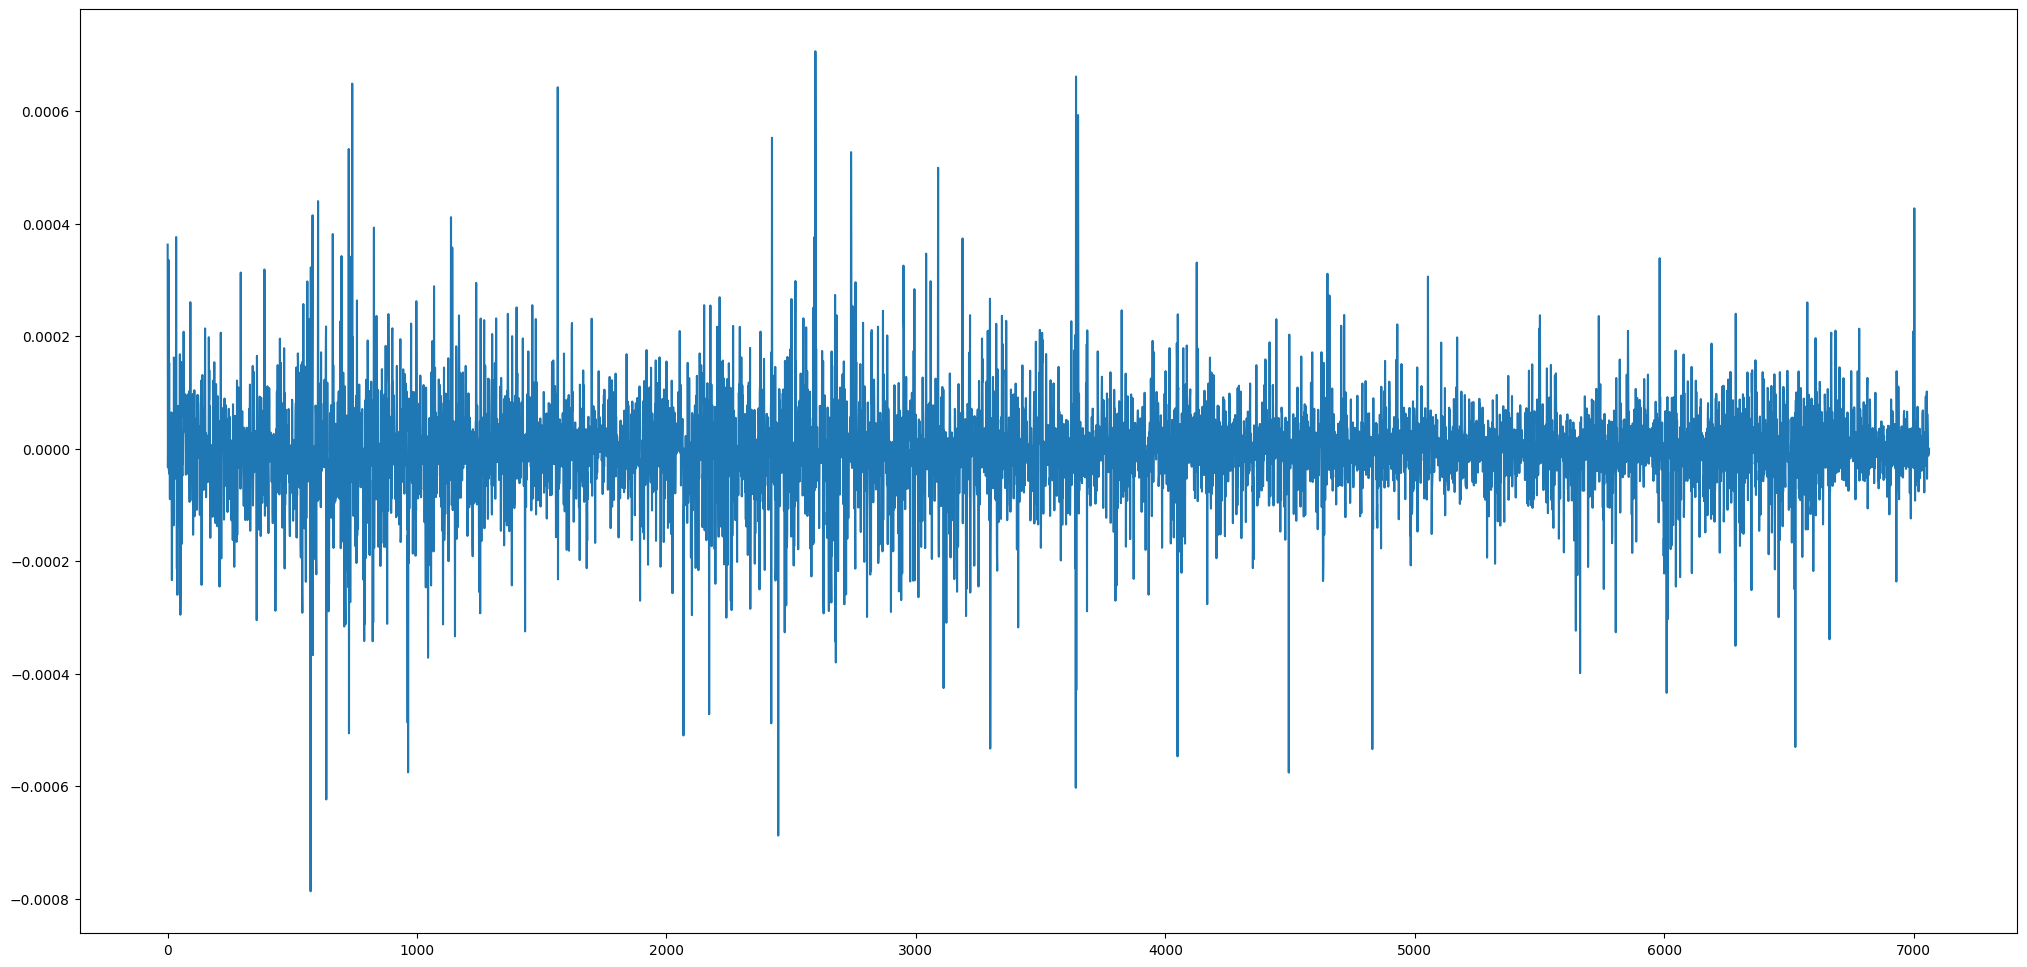

In [55]:
plot.figure(figsize=(25,12))
plot.plot(y)

In [56]:
def createDataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		# for j in range(i, i + time_step):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
X_train, y_train = createDataset(y_train1_array, timeSteps)
X_test, ytest = createDataset(y_test1_array, timeSteps)

In [57]:
print(X_train.shape), print(y_train.shape)

(4586, 3)
(4586,)


(None, None)

In [58]:
print(X_test.shape), print(ytest.shape)

(2469, 3)
(2469,)


(None, None)

In [59]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
X_test.shape

(2469, 3, 1)

In [64]:
# Creating GRU model
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape=(3,1))) 
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

# Adding early stopping 
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 3, 32)             3360      
                                                                 
 gru_13 (GRU)                (None, 3, 32)             6336      
                                                                 
 gru_14 (GRU)                (None, 32)                6336      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16065 (62.75 KB)
Trainable params: 16065 (62.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Training the model
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1, callbacks=[early_stop])

# Prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


Epoch 1/100


72/72 [==============================] - 7s 40ms/step - loss: 4.7217e-06 - val_loss: 4.5306e-08
Epoch 2/100
72/72 [==============================] - 1s 19ms/step - loss: 1.3163e-08 - val_loss: 6.8171e-09
Epoch 3/100
72/72 [==============================] - 1s 19ms/step - loss: 1.0465e-08 - val_loss: 4.5753e-09
Epoch 4/100
72/72 [==============================] - 1s 19ms/step - loss: 9.6330e-09 - val_loss: 4.5460e-09
Epoch 5/100
72/72 [==============================] - 1s 16ms/step - loss: 9.8858e-09 - val_loss: 8.1212e-09
Epoch 6/100
78/78 [==============================] - 1s 11ms/step


In [66]:
# Transformback to original form
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)


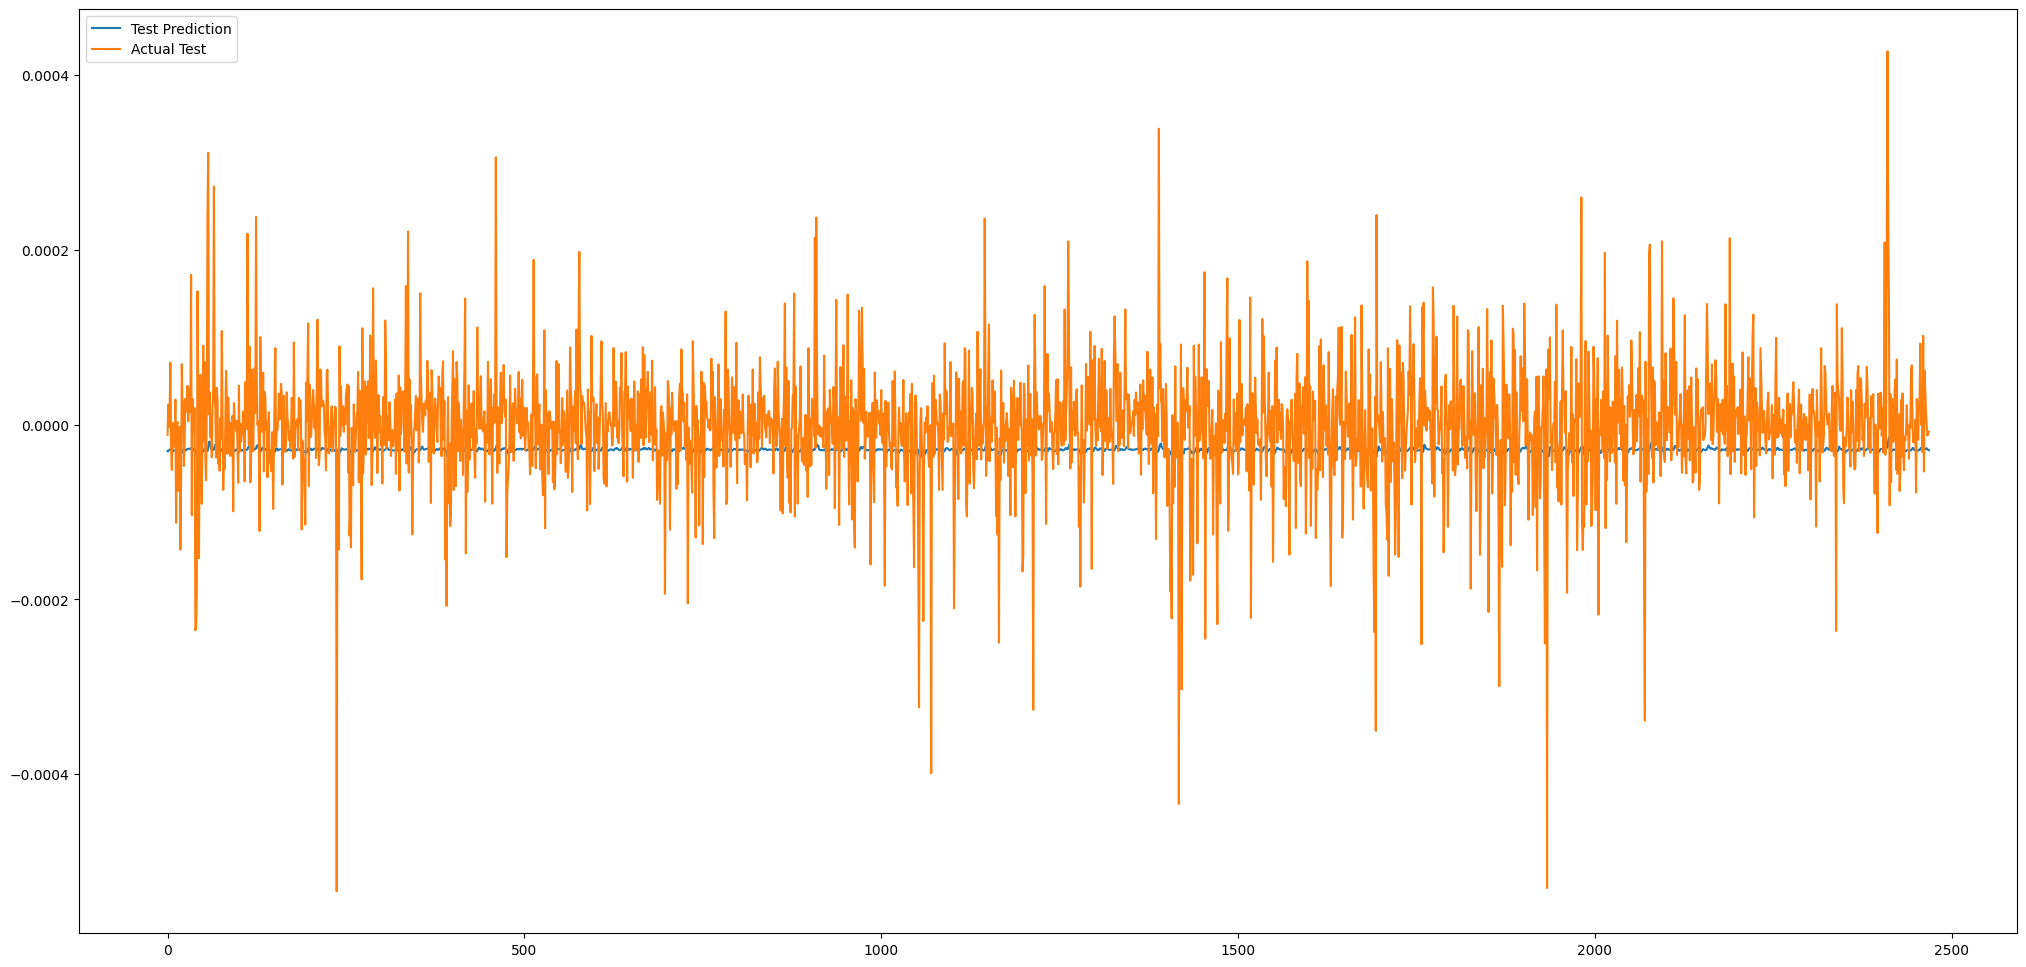

In [67]:
# creating data frame that stores actual and predicted values
train_predict = pd.DataFrame(train_predict)
test_predict = pd.DataFrame(test_predict)

# Plotting the actual and predicted values
plot.figure(figsize=(25,12))
plot.plot(test_predict, label='Test Prediction')
plot.plot(ytest, label='Actual Test')
plot.legend()
plot.show()

In [24]:
# Checking the values of atual and predicted from table
print(train_predict)
print(test_predict)
print(y_train)
print(ytest)


              0
0      0.000035
1      0.000035
2      0.000034
3      0.000034
4      0.000035
...         ...
13753  0.000035
13754  0.000034
13755  0.000034
13756  0.000035
13757  0.000034

[13758 rows x 1 columns]
             0
0     0.000035
1     0.000035
2     0.000034
3     0.000034
4     0.000035
...        ...
7402  0.000035
7403  0.000034
7404  0.000035
7405  0.000035
7406  0.000034

[7407 rows x 1 columns]
[ 3.27358167e-05  3.35553310e-04 -3.84573850e-05 ...  1.22225791e-05
 -1.09114846e-05  2.86282767e-05]
[-1.16446993e-05  2.29972256e-05 -2.62945859e-06 ... -1.24079650e-05
 -9.94053385e-06 -8.11672264e-06]


In [116]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(3,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 3, 50)             10400     
                                                                 
 lstm_16 (LSTM)              (None, 3, 50)             20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
72/72 [==============================] - 7s 31ms/step - loss: 3.8943e-06 - val_loss: 7.5891e-07
Epoch 2/100
72/72 [==============================] - 1s 14ms/step - loss: 2.3660e-06 - val_loss: 7.0595e-07
Epoch 3/100
72/72 [==============================] - 1s 10ms/step - loss: 2.4900e-06 - val_loss: 8.1163e-07
Epoch 4/100
72/72 [==============================] - 1s 9ms/step - loss: 2.3280e-06 - val_loss: 8.9149e-07
Epoch 5/100
72/72 [==============================] - 1s 9ms/step - loss: 2.4092e-06 - val_loss: 7.0443e-07
Epoch 6/100
72/72 [==============================] - 1s 10ms/step - loss: 2.3013e-06 - val_loss: 1.0188e-06
Epoch 7/100
72/72 [==============================] - 1s 11ms/step - loss: 2.3824e-06 - val_loss: 8.2259e-07
Epoch 8/100
72/72 [==============================] - 1s 12ms/step - loss: 2.3667e-06 - val_loss: 7.5337e-07
Epoch 9/100
72/72 [==============================] - 1s 12ms/step - loss: 2.4579e-06 - val_loss: 1.0152e-06
Epoch 10/100
72/72 [==========

In [119]:
import tensorflow as tf

In [120]:
pTrain = model.predict(X_train)
pTest = model.predict(X_test)

78/78 [==============================] - 0s 3ms/step


In [121]:
import math
from sklearn.metrics import mean_squared_error


In [122]:
math.sqrt(mean_squared_error(y_train,pTrain))

0.001518816058810429

> ### Try with scaling, what's more accurate ? 

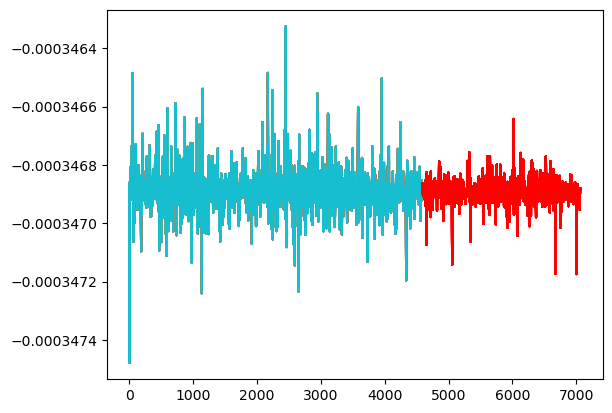

In [125]:
look_back=3

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(pTrain)+look_back, :] = pTrain

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(pTrain)+(look_back*2)+1:len(df1)-1, :] = pTest

plot.plot(trainPredictPlot)

plot.plot(testPredictPlot,"r-")

plot.show()

In [126]:
x_input=y_test1_array[341:].reshape(1,-1)
x_input.shape

(1, 2132)

In [127]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [132]:
# demonstrate prediction for next 1 hour
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])

        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))

        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

0 day input [ 1.68769274e-04  4.75192173e-04 -2.79735929e-05 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


ValueError: cannot reshape array of size 2131 into shape (1,3,1)